In [123]:
import cv2
import numpy as np
import matplotlib.pyplot as plt #resimler üzerinde çizim yapmak için
#çizim yapılan resimleri kaydetmek için
%matplotlib inline

In [124]:
def display(img, cmap=None):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

In [125]:
para = cv2.imread('coin.jpg')

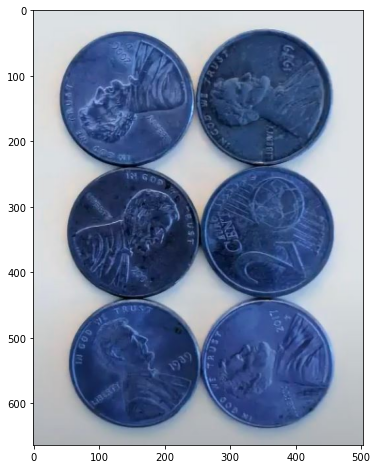

In [126]:
display(para)

In [127]:
#blur uygula 
sep_blur=cv2.medianBlur(para,25)

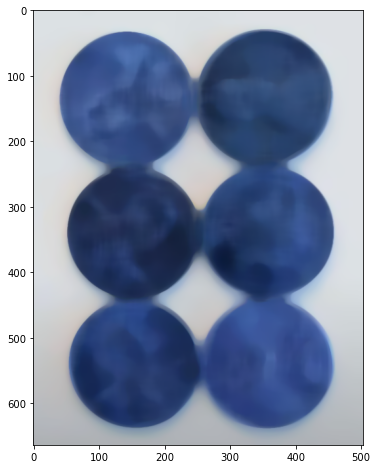

In [128]:
display(sep_blur)

In [129]:
#renk kanalı düzenleme
gri_para = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

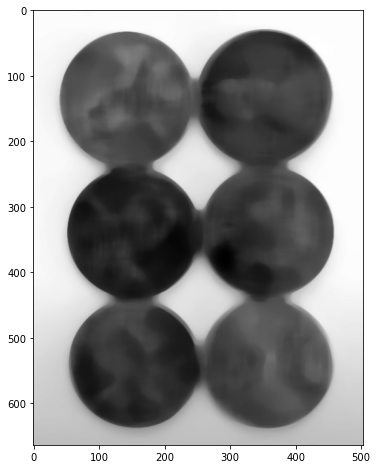

In [130]:
display(gri_para, cmap='gray')

In [131]:
#gürültüsünü azalttığım ve gri formata çevirdiğim görüntüyü thresh ediyorum. 
#                  threshold(goruntu , bu değerin altındaki piksel değerlerini 0 yap, max piksel değerin bu olsun, threshold fonksiyonu  )
ret,sep_thresh=cv2.threshold(gri_para, 160,255,cv2.THRESH_BINARY_INV)

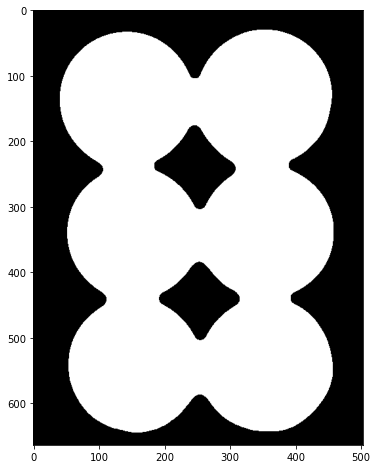

In [132]:
display(sep_thresh, cmap='gray')

In [133]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

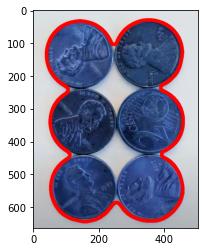

In [134]:
for i in range(len( contours)):
    #eğer hierarchynin son kolonuncaki değer -1 ise 
    if hierarchy [0][i][3] == -1: 
        #bu değerleri kırmızı ile çiz
        cv2.drawContours(para,contours,i,(255,0,0),10 )
    
plt.imshow(para,cmap='gray')

In [135]:
img = cv2.imread('coin.jpg')

In [136]:
img = cv2.medianBlur(img,35)

In [137]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [138]:
ret, thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

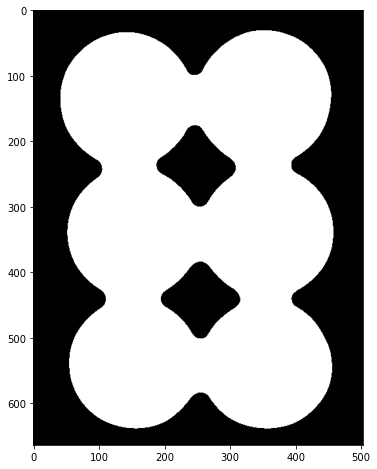

In [139]:
display(thresh, cmap='gray')

In [140]:
#gürültüleri azaltmaya çalısalım
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

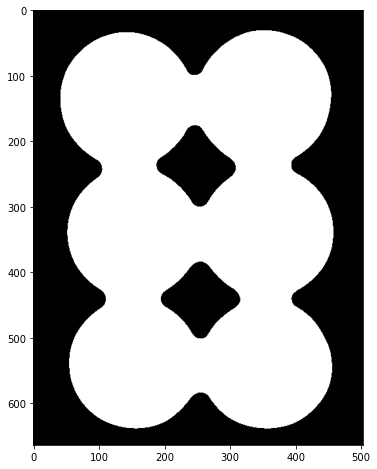

In [141]:
display(opening, cmap='gray')

In [142]:
#ilk önce bir erezyon inceltme işlemi daha sonra dilation yani daha belirgin hale getireceğiz
sure_bg=cv2.dilate(opening,kernel,iterations=3)

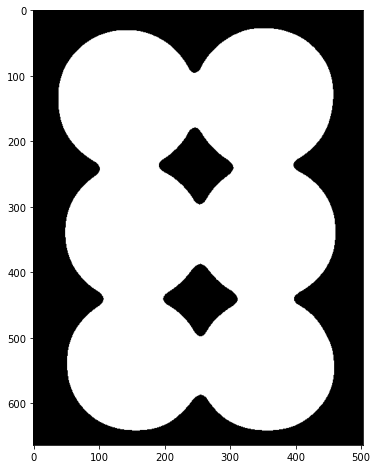

In [143]:
display(sure_bg, cmap='gray')

In [144]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

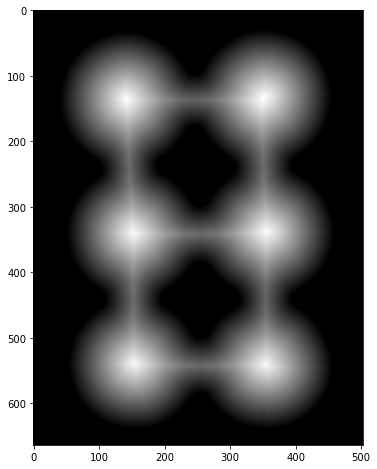

In [145]:
display(dist_transform, cmap='gray')

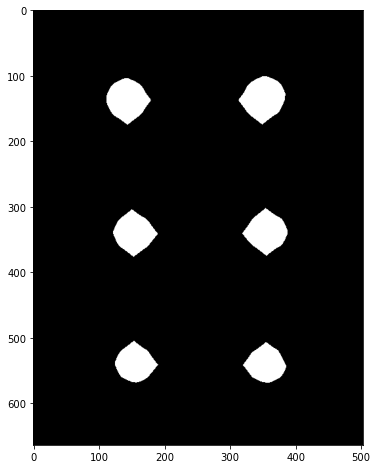

In [146]:
display(sure_fg, cmap='gray')

In [147]:
# parayı 8 bit unsigned integer'a dönüştürme
sure_fg = np.uint8(sure_fg)
#fotoğrafları birlestirme
unknown = cv2.subtract(sure_bg,sure_fg)

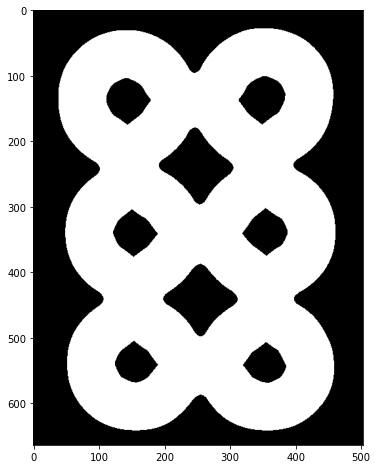

In [148]:
display(unknown, cmap='gray')

In [149]:
#connectedComponents algoritması, verilen bir görüntü üzerinde dolaşarak bağlantılı bileşenleri tespit eder
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0

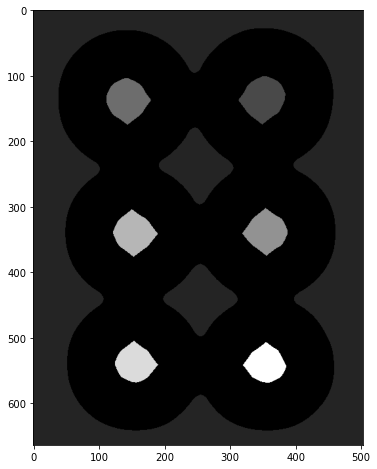

In [150]:
display(markers, cmap='gray')

In [151]:
markers = cv2.watershed(img,markers)

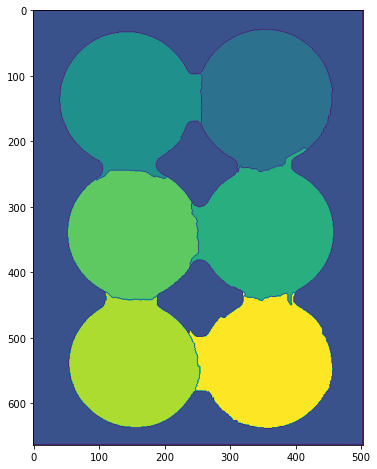

In [152]:
display(markers)

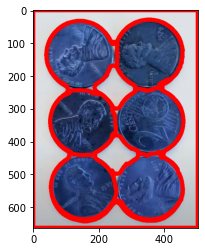

In [153]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    #eğer hierarchynin son kolonuncaki değer -1 ise 
    if hierarchy [0][i][3] == -1: 
        #bu değerleri kırmızı ile çiz
        cv2.drawContours(para,contours,i,(255,0,0),10 )
    
plt.imshow(para,cmap='gray')